In [63]:
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

print (recent_grads.iloc[1])
print (recent_grads.head(5))
print (recent_grads.tail(5))

print (recent_grads.describe())


Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

Drop Rows With Missing Values

In [29]:
#Look Up Nunmber of Rows

raw_data_count = recent_grads.shape[0]

print (raw_data_count)

#dropna 
recent_grads = recent_grads.dropna()

# Look up number of rows post dropna 

cleaned_data_count = recent_grads.shape[0]

print (cleaned_data_count)

173
172


Using Pandas, make Scatterplot between Sample_size and Median

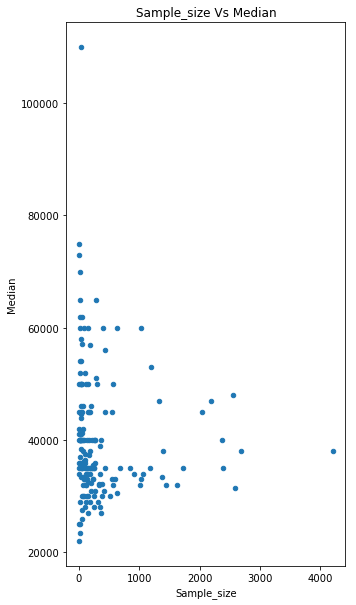

In [30]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size Vs Median', figsize=(5,10))

Scatterplot between Sample Size and Unemployment Rate

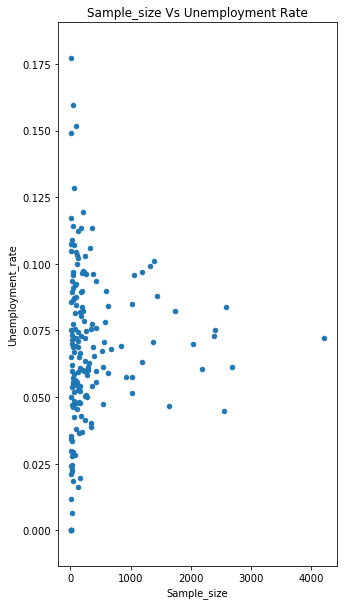

In [31]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size Vs Unemployment Rate', figsize=(5,10))

Scatterplot Full_Time vs Median

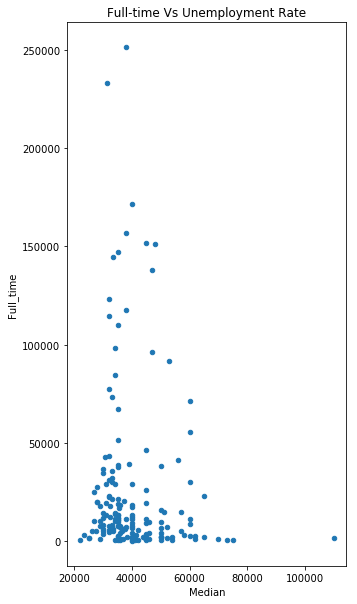

In [32]:
recent_grads.plot(x='Median', y='Full_time', kind='scatter', title='Full-time Vs Unemployment Rate', figsize=(5,10))

Scatterplot ShareWomen and Unemployment_rate

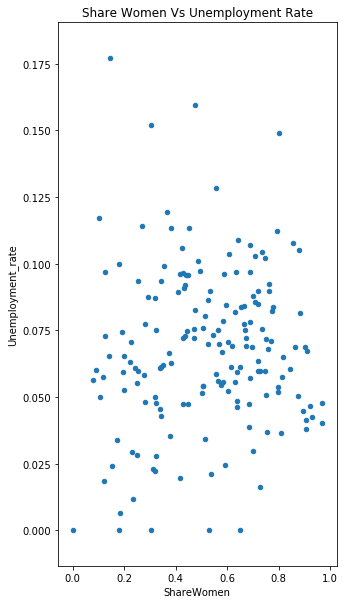

In [33]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share Women Vs Unemployment Rate', figsize=(5,10))

Scatterplot Men vs Median

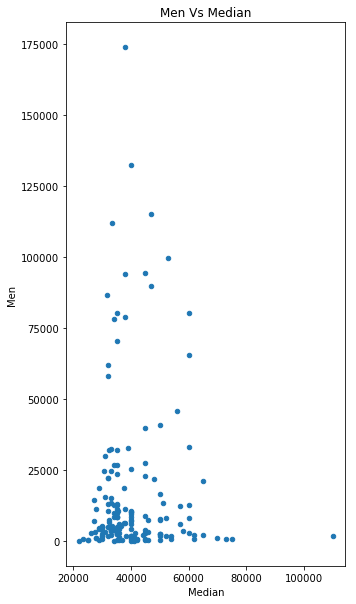

In [34]:
recent_grads.plot(x='Median', y='Men', kind='scatter', title='Men Vs Median', figsize=(5,10))

Scatterplot Women and Median

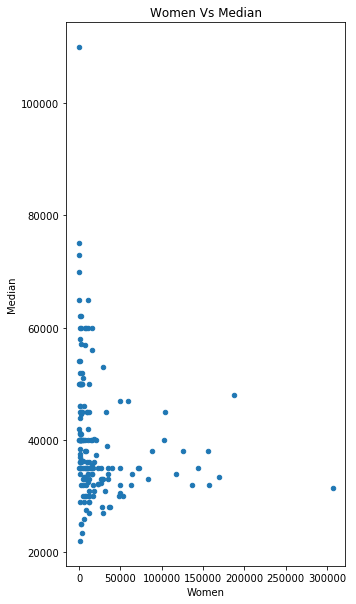

In [35]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women Vs Median', figsize=(5,10))

Generating Some Histograms using Pandas

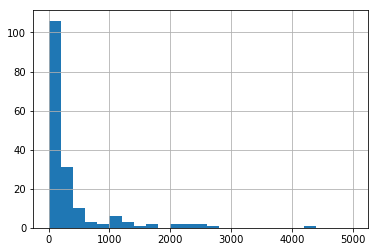

In [36]:
col_list = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
recent_grads[col_list[0]].hist(bins=25, range=(0,5000))

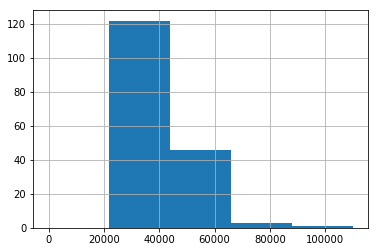

In [37]:
recent_grads['Median'].hist(bins=5, range=(0,110000))

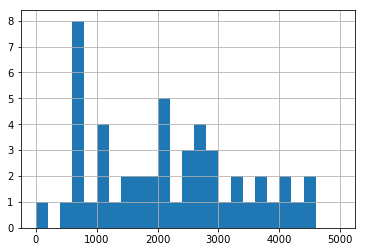

In [38]:
recent_grads['Employed'].hist(bins=25, range=(0,5000))

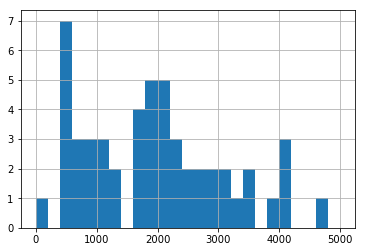

In [39]:
recent_grads['Full_time'].hist(bins=25, range=(0,5000))

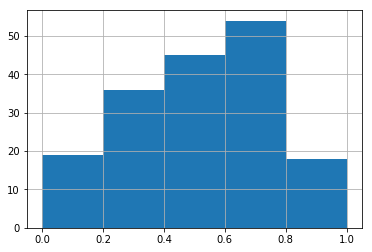

In [40]:
recent_grads['ShareWomen'].hist(bins=5, range=(0,1))

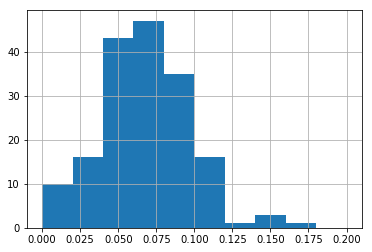

In [41]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,0.2))

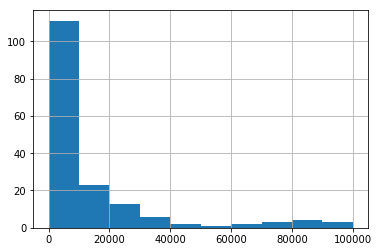

In [42]:
recent_grads['Men'].hist(bins=10, range=(0,100000))

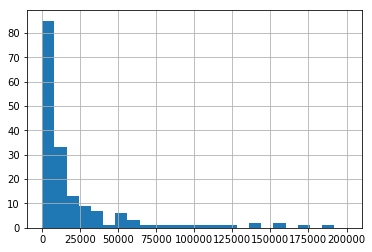

In [43]:
recent_grads['Women'].hist(bins=25, range=(0,200000))

Scatter Matrix using Pandas

Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

C:\Users\neoce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\neoce\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C48D7C940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027C49073D30>]], dtype=object)

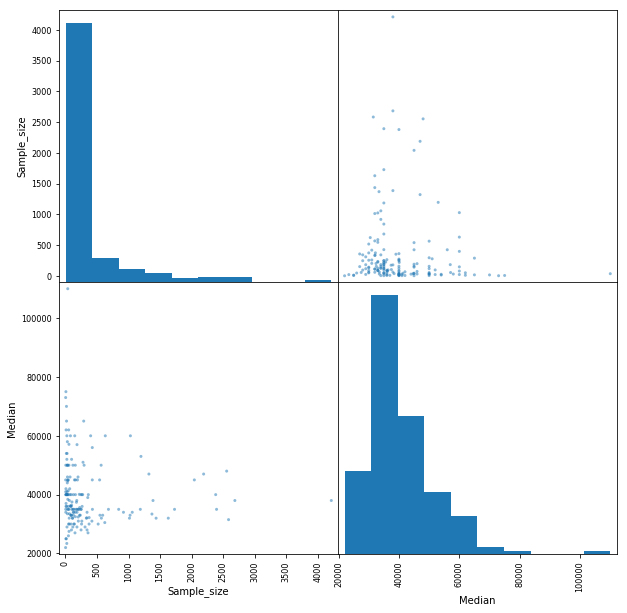

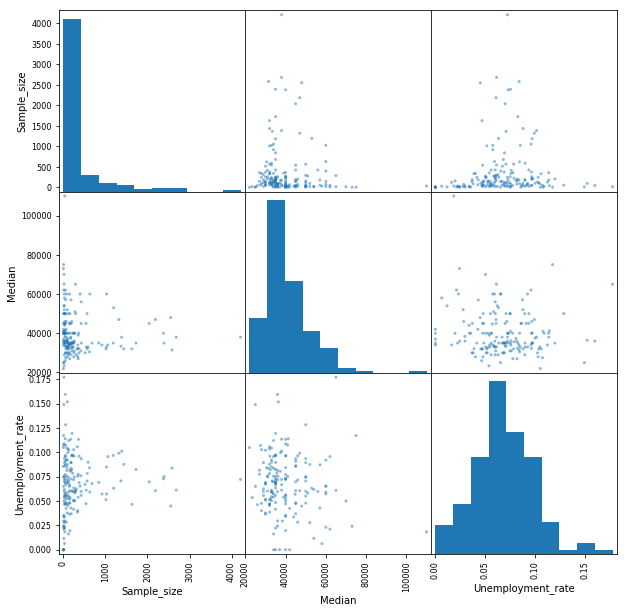

In [44]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))

scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10,10))



Bar plot Using Pandas

1) Use bar plots to compare the percentages of women (ShareWomen) from the 10 highest paying majors and from the 10 lowest paying majors.

2) Use bar plots to compare the unemployment rate (Unemployment_rate) from the 10 highest paying majors and from the 10 lowest paying majors.

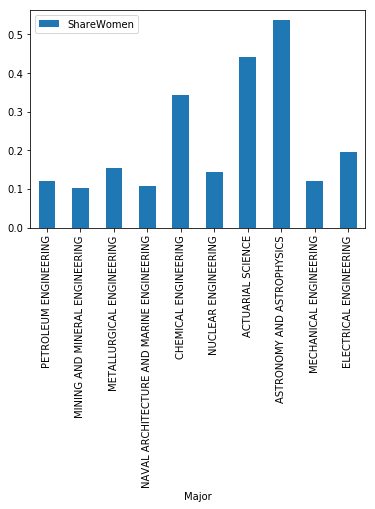

In [57]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

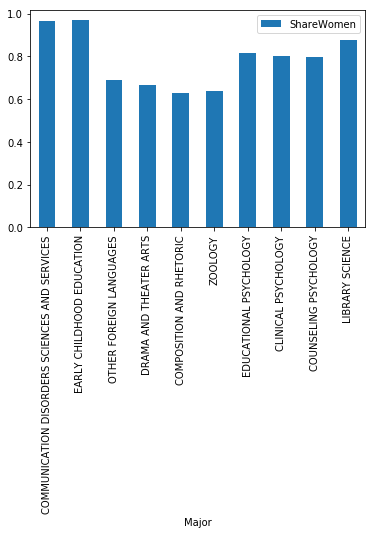

In [58]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

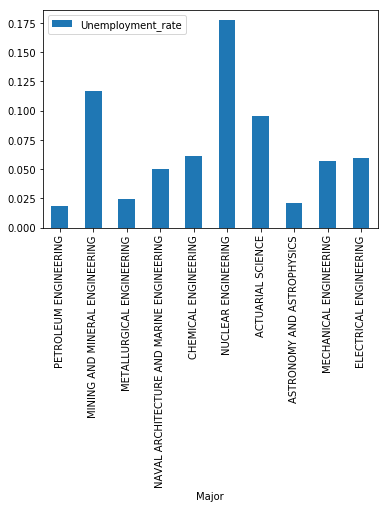

In [59]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

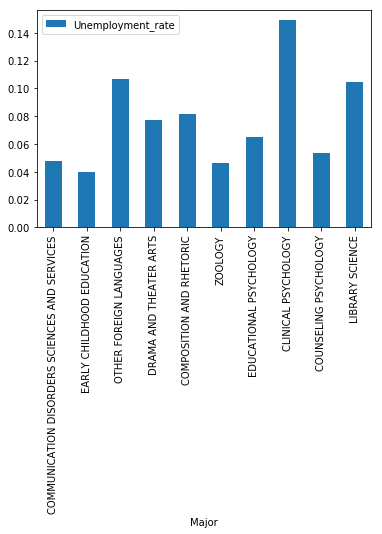

In [60]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

Grouped bar plot to compare the number of men with the number of women in each category of majors.

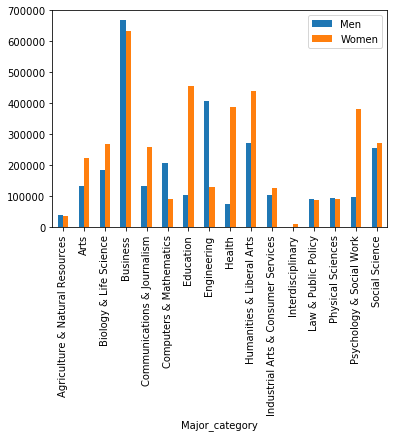

In [67]:
# seems like the best way to do a bar plot if grouped is by using a pivot table then use a bar plot
tbl = recent_grads.pivot_table(index='Major_category', values=['Men','Women'],aggfunc=np.sum) 
# seems like if you y = the two columns as a list, you come up with a grouped bar plot.
# not sure about stacked.
tbl.plot.bar(x=tbl.index,y=['Men','Women'])

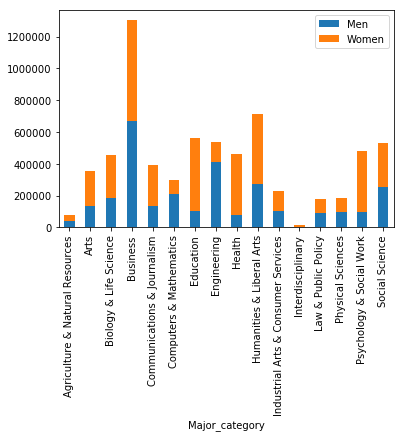

In [68]:
# if want to just stack, then stacked = True is enough
tbl.plot.bar(x=tbl.index,y=['Men','Women'], stacked = True)

Box plot to explore the distributions of median salaries and unemployment rate

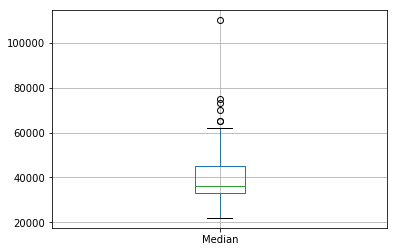

In [72]:
recent_grads.boxplot(column = ['Median'])

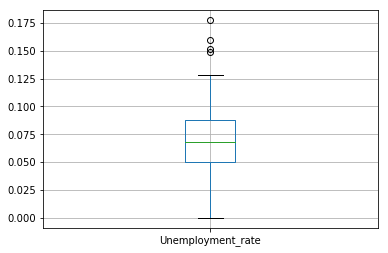

In [70]:
recent_grads.boxplot(column = 'Unemployment_rate')

Hexagonal Bin Plot

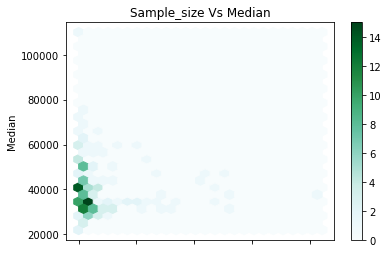

In [75]:
recent_grads.plot.hexbin(x='Sample_size', y='Median',  gridsize = 25,title='Sample_size Vs Median')